In [1]:
# Importamos las librerías necesarias
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
 
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
 
from sklearn.linear_model import LogisticRegression
 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Preparación de datos para PCA e IPCA

In [2]:
# cargamos el dataset
df = pd.read_csv('../Data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# dividimos el dataset en features y target
df_features = df.drop(['target'], axis=1)
df_target = df['target']

In [4]:
# Normalizamos los datos
scaler = StandardScaler()
df_features = scaler.fit_transform(df_features)

# Dividimos el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, random_state=42)

# Implementación del algoritmo PCA e IPCA

In [5]:
# Configuración de la regresión logística
logistic = LogisticRegression(solver='lbfgs')

# PCA
# Llamamos y configuramos nuestro algoritmo PCA
# El número de componentes es opcional
# Si no le pasamos el número de componentes lo asignará de esta forma:
# a: n_components = min(n_muestras, n_features)
pca = PCA(n_components=3)
# Entrenando algoritmo de PCA
pca.fit(X_train)

PCA(n_components=3)

In [6]:
# Configuramos los datos de entrenamiento con PCA
df_train = pca.transform(X_train)
df_test = pca.transform(X_test)
# Entrenamos la regresión logística con datos del PCA
logistic.fit(df_train, y_train)

LogisticRegression()

In [7]:
# Calculamos nuestra exactitud de nuestra predicción
print('Score/Accuracy PCA: ', logistic.score(df_test, y_test))

Score/Accuracy PCA:  0.7857142857142857


In [8]:
# IPCA
# Haremos una comparación con incremental PCA, haremos lo mismo para el IPCA.
# El parámetro batch se usa para crear pequeños bloques,
# de esta forma podemos ir entrenándolos poco a poco y combinarlos en el resultado final
ipca = IncrementalPCA(n_components=3, batch_size=10)
# Entrenando algoritmo de IPCA
ipca.fit(X_train)

# Configuramos los datos de entrenamiento con IPCA
df_train = ipca.transform(X_train)
df_test = ipca.transform(X_test)
# Entrenamos la regresión logística con datos del IPCA
logistic.fit(df_train, y_train)
print('Score/Accuracy IPCA: ', logistic.score(df_test, y_test))

Score/Accuracy IPCA:  0.8051948051948052


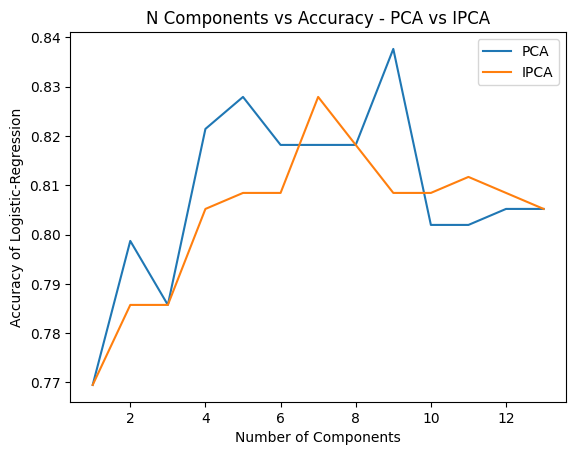

In [9]:
# Verificamos la exactitud de la predicción según el número de componentes

max_features = X_train.shape[1]  # El máximo número de features en este caso sería de 13
pca_data = {'accuracy': [],
            'n_components': []}
ipca_data = {'accuracy': [],
             'n_components': []}
# PCA
for n in range(1, max_features+1):
    pca = PCA(n_components=n)
    pca.fit(X_train)
    df_train = pca.transform(X_train)
    df_test = pca.transform(X_test)
    logistic.fit(df_train, y_train)
    acccuracy = logistic.score(df_test, y_test)
    pca_data['accuracy'].append(acccuracy)
    pca_data['n_components'].append(n)

# IPC
for n in range(1, max_features+1):
    ipca = IncrementalPCA(n_components=n, batch_size=max_features+1)
    ipca.fit(X_train)
    df_train = ipca.transform(X_train)
    df_test = ipca.transform(X_test)
    logistic.fit(df_train, y_train)
    acccuracy = logistic.score(df_test, y_test)
    ipca_data['accuracy'].append(acccuracy)
    ipca_data['n_components'].append(n)

plt.plot(pca_data['n_components'], pca_data['accuracy'], label='PCA')
plt.plot(ipca_data['n_components'], ipca_data['accuracy'], label='IPCA')
plt.title('N Components vs Accuracy - PCA vs IPCA')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy of Logistic-Regression')
plt.legend();

In [10]:
pd.DataFrame(pca_data)

,accuracy,n_components
0,0.769481,1
1,0.798701,2
2,0.785714,3
3,0.821429,4
4,0.827922,5
5,0.818182,6
6,0.818182,7
7,0.818182,8
8,0.837662,9
9,0.801948,10


In [11]:
pd.DataFrame(ipca_data)

,accuracy,n_components
0,0.769481,1
1,0.785714,2
2,0.785714,3
3,0.805195,4
4,0.808442,5
5,0.808442,6
6,0.827922,7
7,0.818182,8
8,0.808442,9
9,0.808442,10


# Kernels y KPCA

In [12]:
from sklearn.decomposition import KernelPCA

# Kernel PCA
# KPCA
# Alternativas a kernel, "linear, poly, rbf"
kpca = KernelPCA(n_components=4, kernel='poly')
kpca.fit(X_train)

KernelPCA(kernel='poly', n_components=4)

In [13]:
# Configuramos los datos de entrenamiento con PCA
df_train = kpca.transform(X_train)
df_test = kpca.transform(X_test)

In [14]:
# Entrenando algoritmo de KPCA
# Entrenamos la regresión logística con datos del PCA
logistic.fit(df_train, y_train)
# Calculamos nuestra exactitud de nuestra predicción
print('Score/Accuracy KPCA: ', logistic.score(df_test, y_test))

Score/Accuracy KPCA:  0.7987012987012987


# Implementación de Lasso y Ridge

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as mse

In [16]:
%run "Funciones Auxiliares/Funciones_Auxiliares.ipynb"

In [17]:
# Cargamos el dataset
df = pd.read_csv('../Data/whr2017.csv')
df.describe()

,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [18]:
# Elegimos las columnas que nos interesan
X = df[['gdp', 'family', 'lifexp', 'freedom', 'corruption', 'generosity', 'dystopia']]

# Definimos el target
y = df['score']

print('X shape: ', X.shape)
print('y shape: ', y.shape)

# Dividimos el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X shape:  (155, 7)
y shape:  (155,)


In [19]:
# Definimos los modelos
models = {"Linear Regression": LinearRegression(),
              "Lasso": Lasso(alpha=0.2),
              "Ridge": Ridge(alpha=1)}

In [20]:
# Utilizamos la función fit_predict_score para entrenar y evaluar los modelos
for name, model in models.items():
    score = fit_predict_score(model, X_train, y_train, X_test, y_test, mse)
    print(f"{name} loss: {score}")

Linear Regression loss: 7.86309606423331e-08
Lasso loss: 0.5736279243509138
Ridge loss: 0.0048636954322665285


In [21]:
resultados = [[name, *model.coef_] for name, model in models.items()]

df_resultados = pd.DataFrame(resultados, columns=['modelo', 'gdp', 'family', 'lifexp', 'freedom', 'corruption', 'generosity', 'dystopia'])
df_resultados

,modelo,gdp,family,lifexp,freedom,corruption,generosity,dystopia
0,Linear Regression,1.000047,0.999907,1.000001,1.000070,0.999854,1.000133,0.999941
1,Lasso,1.028664,0.000000,0.000000,0.000000,0.000000,0.000000,0.250675
2,Ridge,1.065832,0.959320,0.875708,0.889888,0.633821,0.783180,0.960533


# ElasticNet: Una técnica intermedia:

In [22]:
from sklearn.linear_model import ElasticNet

In [25]:
# Definimos los modelos
models = {"Linear Regression": LinearRegression(),
              "Lasso": Lasso(alpha=0.2),
              "Ridge": Ridge(alpha=1),
              "ElasticNet": ElasticNet(random_state=0)}
# Utilizamos la función fit_predict_score para entrenar y evaluar los modelos
for name, model in models.items():
    score = fit_predict_score(model, X_train, y_train, X_test, y_test, mse)
    print(f"{name} loss: {score}")

resultados = [[name, *model.coef_] for name, model in models.items()]

df_resultados = pd.DataFrame(resultados, columns=['modelo', 'gdp', 'family', 'lifexp', 'freedom', 'corruption', 'generosity', 'dystopia'])
df_resultados

Linear Regression loss: 7.86309606423331e-08
Lasso loss: 0.5736279243509138
Ridge loss: 0.0048636954322665285
ElasticNet loss: 1.3470791839716152


,modelo,gdp,family,lifexp,freedom,corruption,generosity,dystopia
0,Linear Regression,1.000047,0.999907,1.000001,1.000070,0.999854,1.000133,0.999941
1,Lasso,1.028664,0.000000,0.000000,0.000000,0.000000,0.000000,0.250675
2,Ridge,1.065832,0.959320,0.875708,0.889888,0.633821,0.783180,0.960533
3,ElasticNet,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
